In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist/", one_hot=True)
num_train=mnist.train.num_examples
num_val=mnist.validation.num_examples
num_test=mnist.test.num_examples

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [2]:
from models.CNN import CNN
from models.SRAM import SRAM
from models.RAM import RAM

In [3]:
batch_size=64
tf.reset_default_graph()
# model=CNN()
model=SRAM()
loss,accuracy=model()
# model=RAM()

In [4]:
def eval(dataset,num_iteration):
    total_loss=0
    total_accuracy=0
    for it in range(num_iteration):
        images,labels=dataset.next_batch(batch_size)
        # no Monte Carlo test during evaludation step
        feed_dict={model.X:images,model.y:labels}
        loss_num,accuracy_num = sess.run([loss,accuracy],feed_dict=feed_dict)
        total_loss+=loss_num
        total_accuracy+=accuracy_num
    total_loss/=num_iteration
    total_accuracy/=num_iteration
    return total_loss,total_accuracy

In [5]:
# saver=tf.train.Saver()
# with tf.Session() as sess:
#     tf.global_variables_initializer().run()
#     saver.restore(sess, "models/parameters/SRAM/SRAM.ckpt")
#     _,acc_train=eval(mnist.train,num_train//batch_size)
#     _,acc_val=eval(mnist.validation,num_val//batch_size)
#     _,acc_test=eval(mnist.test,num_test//batch_size)
#     print('Accuracy on training set is %.3f%%' % (acc_train*100.0))
#     print('Accuracy on validation set is %.3f%%' % (acc_val*100.0))
#     print('Accuracy on testing set is %.3f%%' % (acc_test*100.0))

INFO:tensorflow:Restoring parameters from models/parameters/SRAM/SRAM.ckpt
1.0


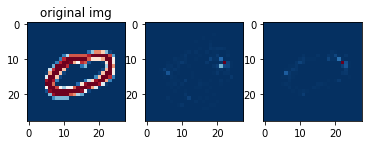

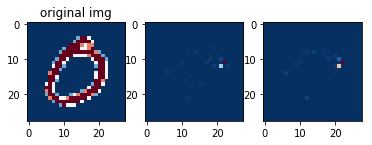

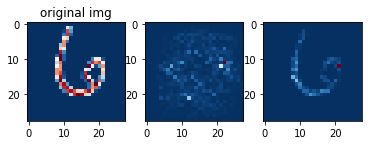

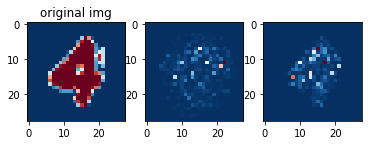

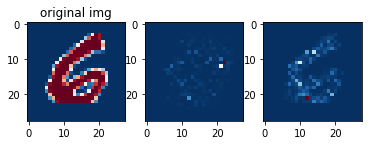

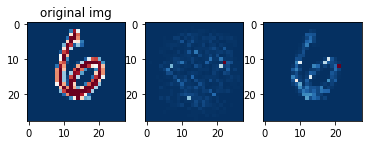

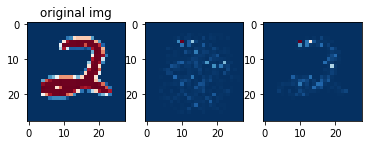

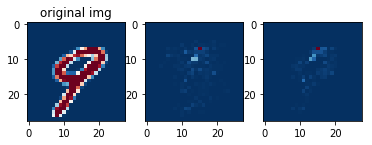

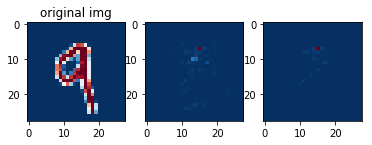

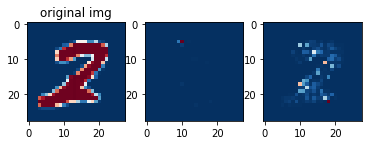

In [9]:
saver=tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "models/parameters/SRAM/SRAM.ckpt")
    num_batch=10
    images,labels=mnist.test.next_batch(num_batch)
    accuracy_num,mask_his=sess.run([accuracy,model.mask_his],feed_dict={model.X:images,model.y:labels})
    print(accuracy_num)
    for im_id in range(num_batch):
        img=images[im_id,:].reshape(28,28)
        plt.subplot('131')
        plt.imshow(img,cmap='RdBu_r')
        plt.title('original img')
#         m_his=[]
#         for t in range(10):
#             mask=mask_his[t][im_id,:].reshape(28,28)
#             mask=np.pad(mask,pad_width=1,mode='constant',constant_values=0)
#             m_his.append(mask)
#         st=np.hstack(m_his)
        
        plt.subplot('132')
        plt.imshow(mask_his[-1][im_id,:].reshape(28,28),cmap='RdBu_r')
        
        plt.subplot('133')
        plt.imshow((mask_his[-1][im_id,:].reshape(28,28)*img),cmap='RdBu_r')
        plt.show()